## Arboles de decision

Brean Estiven Vidales

In [ ]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el dataset
dataset = pd.read_csv('winequality-red.csv')

# Ver las primeras filas del dataset
print(dataset.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [8]:
# Resumen estadístico del dataset
print(dataset.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [10]:
# Verificar datos faltantes
print(dataset.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


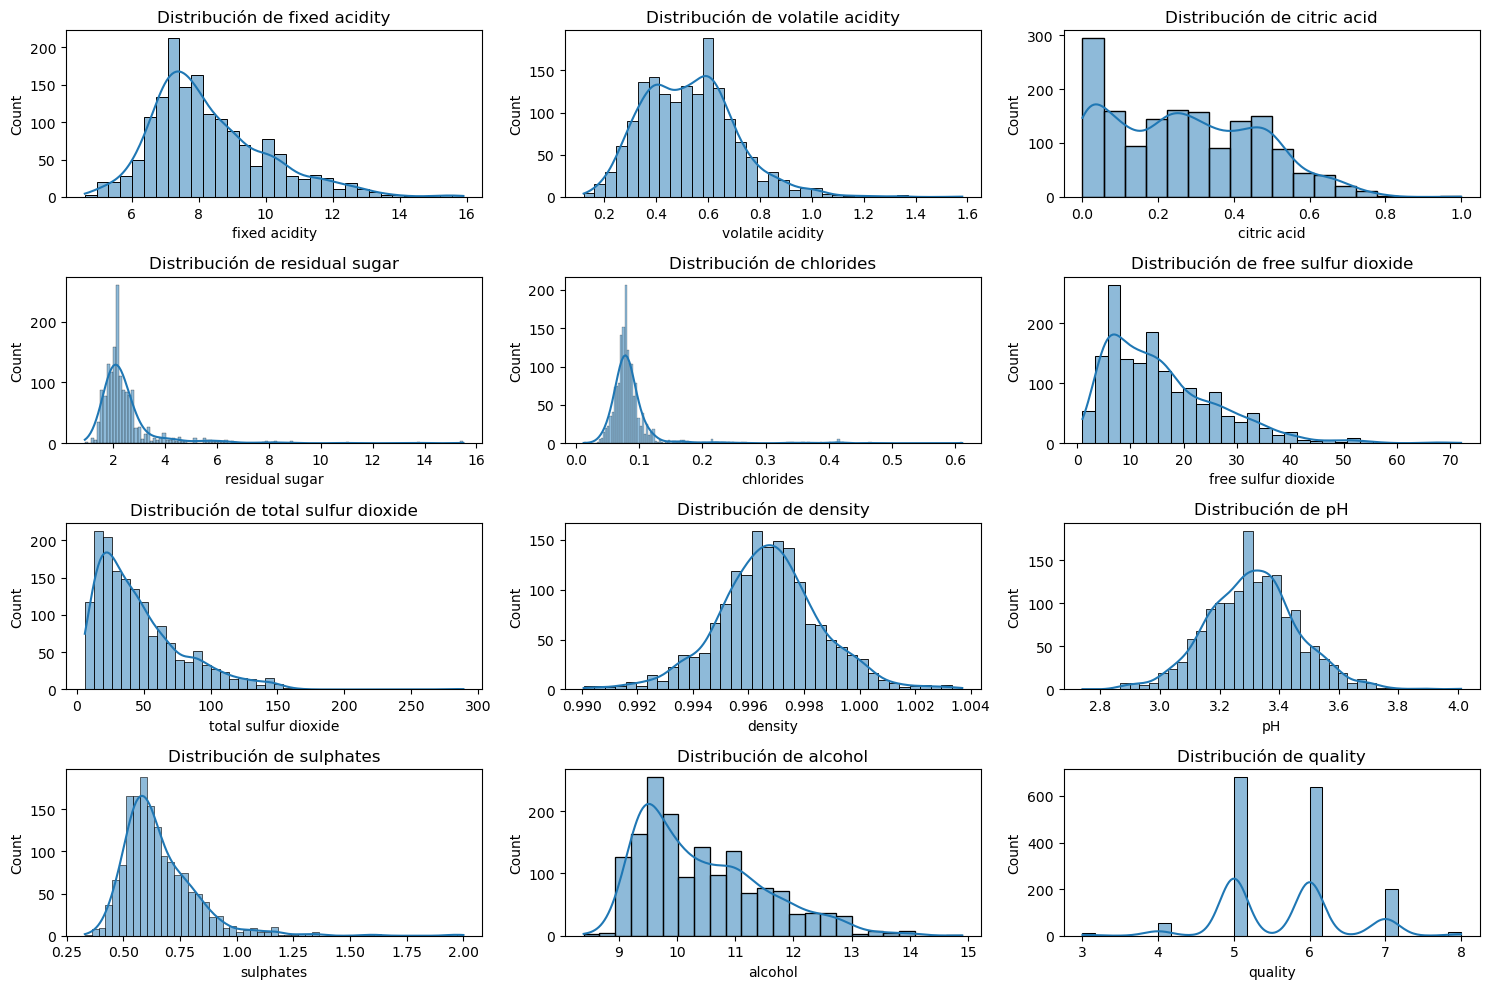

In [12]:
# Visualizar la distribución de algunas variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(dataset.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(dataset[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()


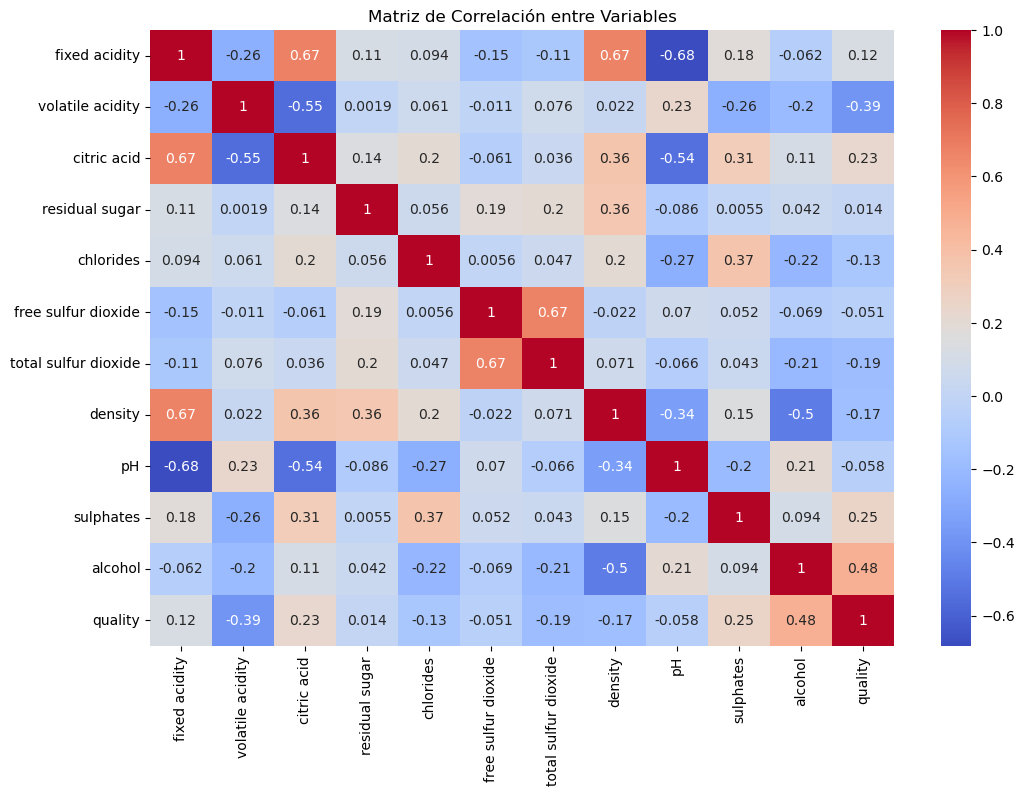

In [14]:
# Matriz de correlación
correlation_matrix = dataset.corr()

# Mostrar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables')
plt.show()


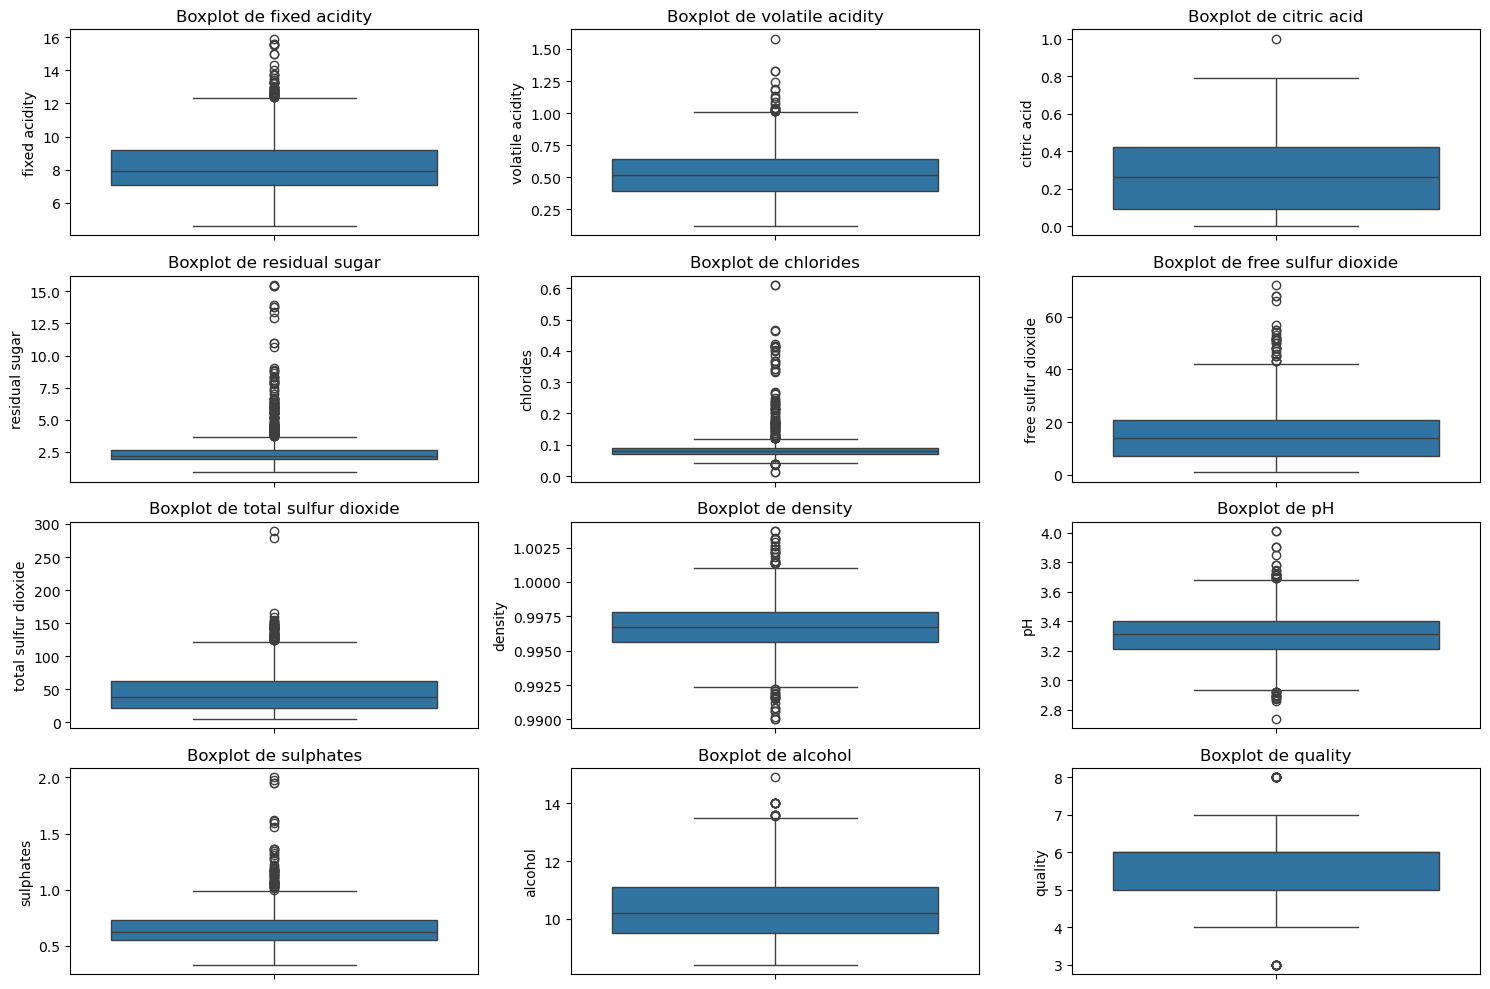

In [16]:
# Visualizar posibles outliers con boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(dataset.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=dataset[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()


In [18]:
# Separar características y variable objetivo
X = dataset.drop('quality', axis=1)  # Variables independientes
y = dataset['quality']  # Variable objetivo


In [20]:
# Dividir el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (1279, 11)
Tamaño del conjunto de prueba: (320, 11)


In [22]:
# Crear el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)


In [24]:
# Calcular las métricas de evaluación
exactitud = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print(f"Exactitud: {exactitud:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Exactitud: 0.56
Precisión: 0.55
Recall: 0.56
F1-score: 0.55


In [26]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
parametros = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), parametros, scoring='accuracy', cv=5, n_jobs=-1)

# Realizar la búsqueda en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Usar el mejor modelo encontrado para hacer predicciones
mejor_modelo = grid_search.best_estimator_
y_pred_optimizado = mejor_modelo.predict(X_test)

# Evaluar el modelo optimizado
exactitud_opt = accuracy_score(y_test, y_pred_optimizado)
precision_opt = precision_score(y_test, y_pred_optimizado, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimizado, average='weighted')
f1_opt = f1_score(y_test, y_pred_optimizado, average='weighted')

# Mostrar las métricas del modelo optimizado
print(f"\nExactitud (modelo optimizado): {exactitud_opt:.2f}")
print(f"Precisión (modelo optimizado): {precision_opt:.2f}")
print(f"Recall (modelo optimizado): {recall_opt:.2f}")
print(f"F1-score (modelo optimizado): {f1_opt:.2f}")


Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Exactitud (modelo optimizado): 0.56
Precisión (modelo optimizado): 0.55
Recall (modelo optimizado): 0.56
F1-score (modelo optimizado): 0.55


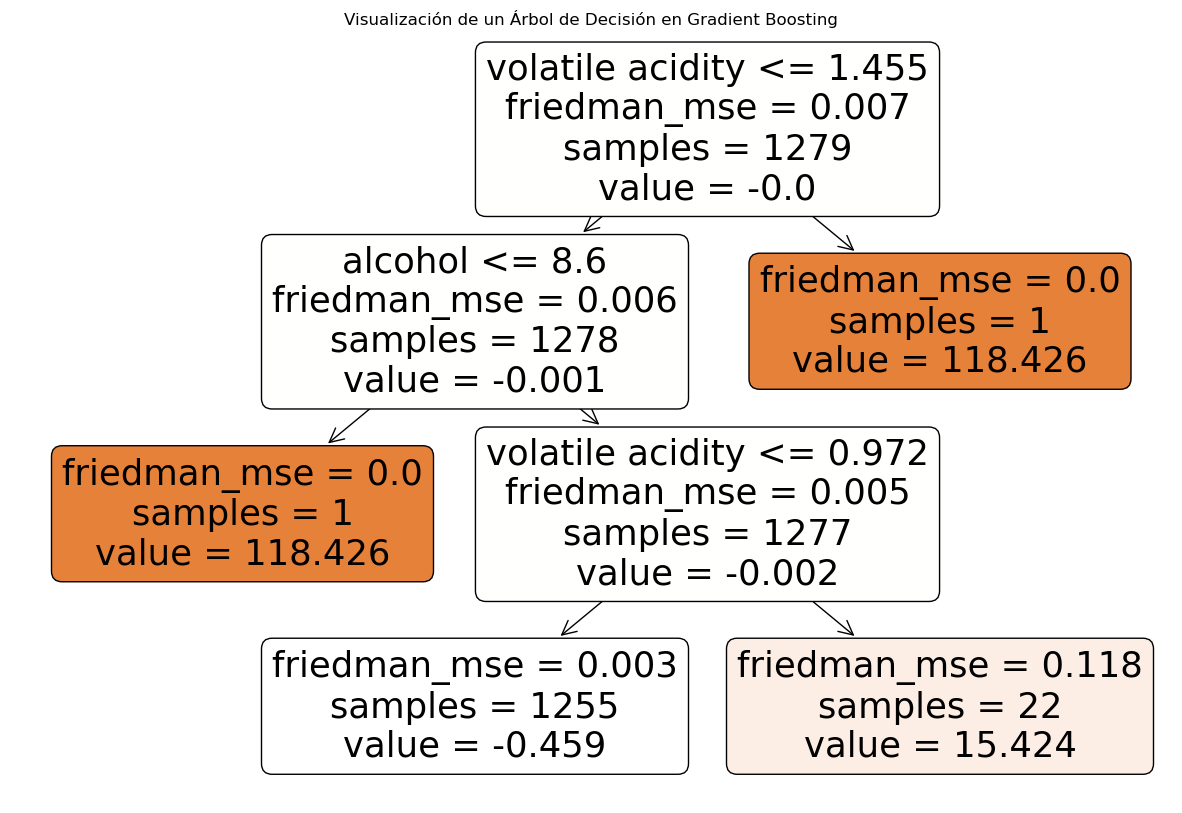

In [34]:
from sklearn.tree import plot_tree

# Seleccionamos el primer árbol del modelo de Gradient Boosting
primer_arbol = modelo_gb.estimators_[0, 0]  # Primer árbol del primer ciclo de boosting

# Configuramos el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Dibujamos el árbol
plot_tree(primer_arbol, feature_names=X.columns, class_names=['Baja Calidad', 'Alta Calidad'], filled=True, rounded=True)
plt.title("Visualización de un Árbol de Decisión en Gradient Boosting")
plt.show()


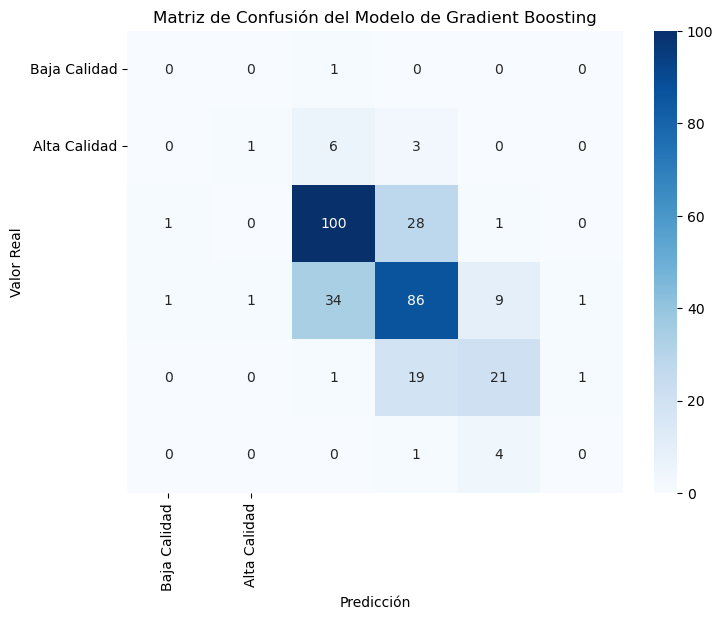

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred_gb)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Baja Calidad', 'Alta Calidad'], yticklabels=['Baja Calidad', 'Alta Calidad'])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión del Modelo de Gradient Boosting")
plt.show()


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo de Gradient Boosting
modelo_gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_gb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_gb = modelo_gb.predict(X_test)

# Evaluar el modelo de Gradient Boosting
exactitud_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

# Mostrar las métricas de evaluación
print(f"Exactitud (Gradient Boosting): {exactitud_gb:.2f}")
print(f"Precisión (Gradient Boosting): {precision_gb:.2f}")
print(f"Recall (Gradient Boosting): {recall_gb:.2f}")
print(f"F1-score (Gradient Boosting): {f1_gb:.2f}")


Exactitud (Gradient Boosting): 0.65
Precisión (Gradient Boosting): 0.64
Recall (Gradient Boosting): 0.65
F1-score (Gradient Boosting): 0.64
